# Reporte de avances modelo Sentan-I

In [1]:
from Src.pre_processing import load_data, split, to_tensor, to_labels 
from Src.Sentan_Model import Sentan_Model
from Src.Dias_Model import Dias_Model
from Src.model_evaluation import confussion_matrix, summary, accuracy
from Src.model_training import train

import torch
from sklearn.model_selection import train_test_split
from torch.optim import Adam
from torch import nn


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

### Preparación de los datos

Los datos serán cargados desde una versión del conjunto de datos RAVDESS, se representan como un conjunto de 193 variables por cada muestra.

In [2]:
data_path = 'Data/data.pkl'
X, y, labels = load_data(data_path)

## Modelo base
Como modelo base se utiliza un modelo propuesto por Dias, por falta de información este modelo no puede ser replicado de manera exacta, sin embargo es un buen modelo a utilizar como base ya que presenta muchas oportunidades de mejora.

Este modelo presenta la siguiente topología:

<img src="imgs/topologia_Issa.png" alt="Topología Dias" width="700"/>

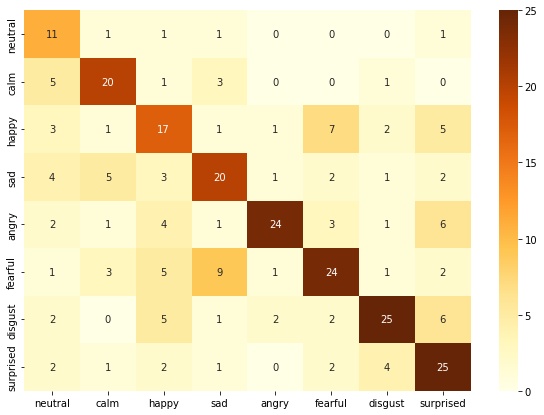

              precision    recall  f1-score   support

           0      0.367     0.733     0.489        15
           1      0.625     0.667     0.645        30
           2      0.447     0.459     0.453        37
           3      0.541     0.526     0.533        38
           4      0.828     0.571     0.676        42
           5      0.600     0.522     0.558        46
           6      0.714     0.581     0.641        43
           7      0.532     0.676     0.595        37

    accuracy                          0.576       288
   macro avg      0.582     0.592     0.574       288
weighted avg      0.605     0.576     0.581       288



In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_test, y_test = to_tensor(X_test, y_test)

# Hiperparametros de entrenamiento
base_model = Dias_Model()
loss_fn = nn.CrossEntropyLoss()
optimizer = Adam(base_model.parameters(), lr=1e-3)


# Entrenamiento del modelo
train(base_model, X_train, y_train, device, optimizer, loss_fn, epochs=100)


# Predicciones tomadas del modelo
pred = base_model(X_test)
decode_pred = torch.argmax(pred, dim=1)


# Evaluación de resultados
confussion_matrix(y_test, decode_pred, labels)
summary(y_test, decode_pred)

torch.save(base_model.state_dict(), f'base_rs0.pt')


## Modelo Sentan-I
Modelo creado para intentar superar al modelo de Dias Issa et al. basado en la información teórica que se brinda en su investigación.

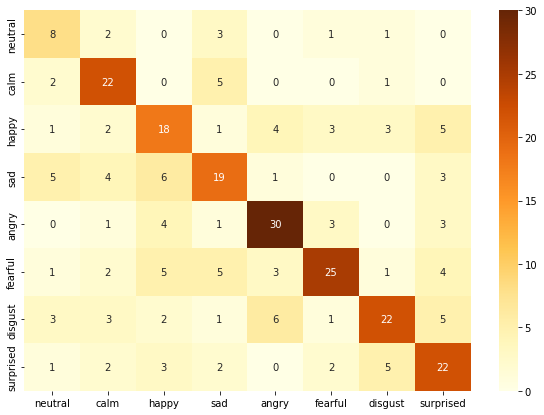

              precision    recall  f1-score   support

           0      0.381     0.533     0.444        15
           1      0.579     0.733     0.647        30
           2      0.474     0.486     0.480        37
           3      0.514     0.500     0.507        38
           4      0.682     0.714     0.698        42
           5      0.714     0.543     0.617        46
           6      0.667     0.512     0.579        43
           7      0.524     0.595     0.557        37

    accuracy                          0.576       288
   macro avg      0.567     0.577     0.566       288
weighted avg      0.589     0.576     0.577       288



In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_test, y_test = to_tensor(X_test, y_test)

# Hiperparametros de entrenamiento
sentan_model = Sentan_Model()
loss_fn = nn.CrossEntropyLoss()
optimizer = Adam(sentan_model.parameters(), lr=1e-3)


# Entrenamiento del modelo
train(sentan_model, X_train, y_train, device, optimizer, loss_fn, epochs=100)


# Predicciones tomadas del modelo
pred = sentan_model(X_test)
decode_pred = torch.argmax(pred, dim=1)


# Evaluación de resultados
confussion_matrix(y_test, decode_pred, labels)
summary(y_test, decode_pred)

torch.save(sentan_model.state_dict(), f'sentan_rs0.pt')

## Propuestas de mejora